## **Best Seller Tattoo products in Amazon (Nov 2023)** 

### ETL and Data Analysis with SQL and Python

The criteria for selecting the best products only include products with a price greater than $200.

#### **1. EXTRACT: Retrieve the data from Amazon using a Python webscraper**

I tried first doing this directly in Jupyter Notebooks but there were too many errors:

    A Scrapy 503 Service Unavailable Error is logged when the backend server your spider is trying to connect to returns a 503 HTTP   
    status code. Meaning the server is currently unable to handle incoming requests. Either because the server is down for maintenance   
    or is too overloaded with incoming requests and can't handle anymore. However, oftentimes when your spider gets this error you can   
    connect to the target website normally with your browser. This means that the server is likely returning the 503 HTTP status code on   
    purpose to your scraper. Most likely because the server believes you are a scraper and is blocking you.

The solution to the error was to create the webscraper directly in my computer downloading the HTML code for each page we are webscraping.   

The information we want from each product is: 

    - link with the image of the product
    - Title of the product as described in Amazon
    - The rating 
    - The price
    - The price for prime members
    - The number of ratings

#### **2. TRANSFORM: Cleanse the data to improve data quality and establish consistency**

    - Remove extra spaces from name
    - Include decimals in prices
    - Remove dollar sign from prices
    - Remove commas ‘,’ from prices

#### **3. LOAD: Load marketplace data into a target database** 

    - Data retrieved in Json files to be converted into csv files
    - Create a Database in PostgreSQL with tattoo products
    - Create a table with bestseller tattoo products
    - Load csv files into bestseller table



In [1]:
import pandas as pd

file_paths = [
    "C:/Users/User/Documents/DataAnalyst/Webscrape/SQL/data1.csv",
    "C:/Users/User/Documents/DataAnalyst/Webscrape/SQL/data2.csv",
    "C:/Users/User/Documents/DataAnalyst/Webscrape/SQL/data3.csv"
]

data_frames = [pd.read_csv(file) for file in file_paths]

tattoo_data = pd.concat(data_frames, ignore_index=True)

In [6]:
tattoo_data

,link,title,rating,price,prime_price,num_of_ratings
0,./Index_files/71Ioct4CuqL._AC_UL320_.jpg,Ambition Soldier Wireless Tattoo Machine Kit C...,4.6 out of 5 stars,249.99,224.99,176
1,./Index_files/718vZwUgrwL._AC_UL320_.jpg,Mast Tattoo Wireless Tattoo Kit Fold Pro Tatto...,4.2 out of 5 stars,285.99,243.09,134
2,./Index_files/71IxX6UrmFL._AC_UL320_.jpg,"Mast Tattoo Pro Kit, The Fold2 Wireless Tattoo...",4.5 out of 5 stars,219.99,175.99,11
3,./Index_files/51ugJarFQlL._AC_UL320_.jpg,Ambition Soldier Rotary Battery Pen with Extra...,4.6 out of 5 stars,219.99,186.99,918
4,./Index_files/41mkDNmdshL._AC_UL320_.jpg,Mast Racer Tattoo Pen Machine Wireless Battery...,4.3 out of 5 stars,289.00,231.20,21
...,...,...,...,...,...,...
109,./page3_files/71tWbu22FvL._AC_UL320_.jpg,Complete Scalp Micropigmentation kit by DermMicro,4.0 out of 5 stars,459.99,NaN,43
110,./page3_files/61ggOD8LG+L._AC_UL320_.jpg,Madluvv Deluxe Ink Set - 10 Colors + Shading S...,4.2 out of 5 stars,259.95,NaN,461
111,./page3_files/31hbHPoPW7L._AC_UL320_.jpg,Perma Blend Permanent Makeup Ink Pigments for ...,5.0 out of 5 stars,240.00,NaN,1
112,./page3_files/71zL7JT+rKL._AC_UL320_.jpg,Pro Machine Kit - Jconly SOLAR Machine with Wi...,4.7 out of 5 stars,229.99,NaN,7


#### **4. Data analysis: Queries using SQL and Python, plust Matplotlib/Seaborn Visualizations**

**A. Highest-rated product organized by the number of ratings**

**SQL Query:**

SELECT * FROM best_sellers      
WHERE rating = (SELECT MAX(rating) FROM best_seller)     
ORDER BY num_of_ratings DESC;

**Python Query:**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Find the maximum rating in the DataFrame
max_rating = tattoo_data['rating'].max()

# Filter for rows with the maximum rating
highest_rated_products = tattoo_data[tattoo_data['rating'] == max_rating]

# Sort the filtered DataFrame by the number of ratings in descending order
highest_rated_products = highest_rated_products.sort_values(by='num_of_ratings', ascending=False)

In [5]:
highest_rated_products

,link,title,rating,price,prime_price,num_of_ratings
89,./page2_files/61eU8xYD3JS._AC_UL320_.jpg,Wireless Machine Pen Kit- Beoncall Rotary 40pc...,5.0 out of 5 stars,209.99,NaN,13
28,./Index_files/8179LmIObBL._AC_UL320_.jpg,Tattoo Kit - Xnet Titan Wireless Tattoo Machin...,5.0 out of 5 stars,223.99,NaN,8
48,./page2_files/41r3THyhKmL._AC_UL320_.jpg,Bishop Rotary Shader Wand Pen-Style Rotary Tat...,5.0 out of 5 stars,NaN,NaN,4
72,./page2_files/318SJ68sooL._AC_UL320_.jpg,Axys Valhalla Rotary Pen Tattoo Machine — Pink,5.0 out of 5 stars,699.99,NaN,3
104,./page3_files/41M22vGaurL._AC_UL320_.jpg,Thermal Copier Tattoo Stencil Transfer Copier ...,5.0 out of 5 stars,206.76,NaN,3
62,./page2_files/41jrkMAxbgL._AC_UL320_.jpg,Peak Solice Modular Pen Tattoo Machine — Black,5.0 out of 5 stars,299.99,NaN,3
79,./page2_files/41-xsIfCgWL._AC_UL320_.jpg,Peak Matrix Pen Rotary Tattoo Machine — Silver,5.0 out of 5 stars,239.99,NaN,3
33,./Index_files/614L0cEaHwL._AC_UL320_.jpg,Tattoo Battery Pen Double Lithium Battery Wire...,5.0 out of 5 stars,367.00,NaN,3
36,./Index_files/51Dw+rixnCL._AC_UL320_.jpg,FK Irons - EXO Black Ops + 2 PowerBolts 3.2mm ...,5.0 out of 5 stars,974.99,NaN,3
61,./page2_files/41X2T5xfflL._AC_UL320_.jpg,Peak Matrix Pen Rotary Tattoo Machine — Orange,5.0 out of 5 stars,239.99,NaN,2


**Matplotlib Visualization**

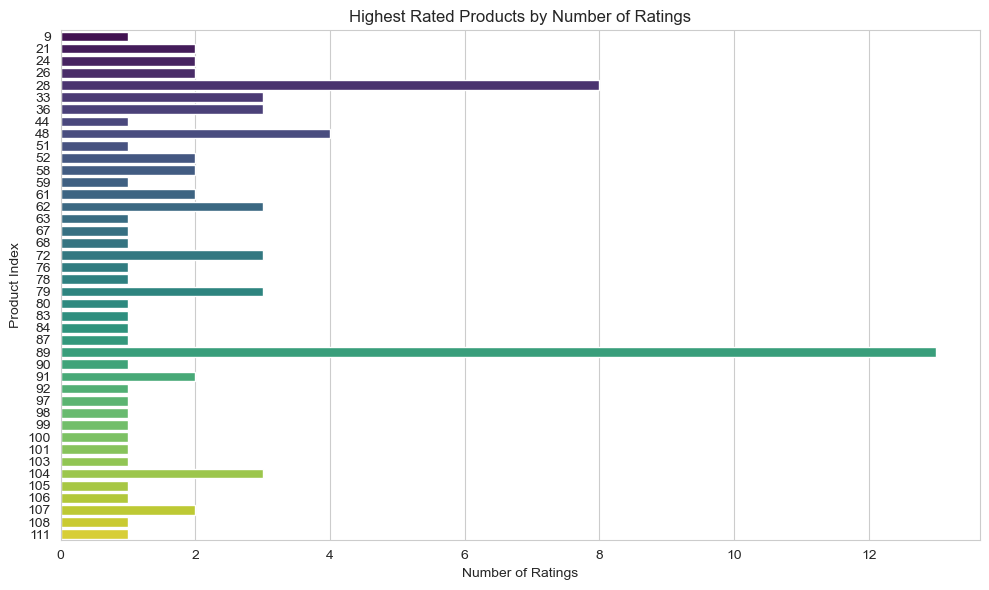

In [38]:
import matplotlib.pyplot as plt

# Create a horizontal bar plot to visualize the highest-rated products by number of ratings using index numbers
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the data with index numbers on the y-axis, making them horizontal
sns.barplot(x='num_of_ratings', y=highest_rated_products.index, data=highest_rated_products, palette="viridis", orient='h')

# Customize the plot
plt.title("Highest Rated Products by Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Index")

# Show the plot
plt.tight_layout()
plt.show()

**B. List of product with the best deals with the biggest savings for prime members**

**SQL Query:**

SELECT title, price, prime_price,  
       (price::numeric - prime_price::numeric) AS savings  
FROM best_sellers  
WHERE prime_price IS NOT NULL  
ORDER BY savings DESC;

In [65]:
import pandas as pd

# Assuming you have the 'tattoo_data' DataFrame

# Filter out rows with 'prime_price' as 'null' and create a copy
filtered_data = tattoo_data.dropna(subset=['prime_price']).copy()

# Calculate the price difference and select specific columns
filtered_data['savings'] = filtered_data['price'] - filtered_data['prime_price']

# Select the desired columns
result = filtered_data[['title', 'price', 'prime_price', 'savings']]

# Sort the DataFrame by the savings in descending order
sorted_result = result.sort_values(by='savings', ascending=False)

# Display the sorted DataFrame
print(sorted_result)

                                                title   price  prime_price  \
4   Mast Racer Tattoo Pen Machine Wireless Battery...  289.00       231.20   
10  Mast Tattoo Flip Pro Wireless & Cord Tattoo Pe...  219.00       164.25   
12  Mast Lancer Wireless Rotary Tattoo Pen Machine...  205.99       154.49   
88  Cartridge Machine Kit - Autdor Complete Rotary...  239.99       191.99   
11  HAWINK Wireless Tattoo Machine Rotary Pen Kit ...  229.99       183.99   
2   Mast Tattoo Pro Kit, The Fold2 Wireless Tattoo...  219.99       175.99   
1   Mast Tattoo Wireless Tattoo Kit Fold Pro Tatto...  285.99       243.09   
3   Ambition Soldier Rotary Battery Pen with Extra...  219.99       186.99   
9   Ambition Soldier Tattoo Kit - Wireless Tattoo ...  279.99       251.99   
0   Ambition Soldier Wireless Tattoo Machine Kit C...  249.99       224.99   

    savings  
4     57.80  
10    54.75  
12    51.50  
88    48.00  
11    46.00  
2     44.00  
1     42.90  
3     33.00  
9     28.00  
0

**Matplotlib Visualization**

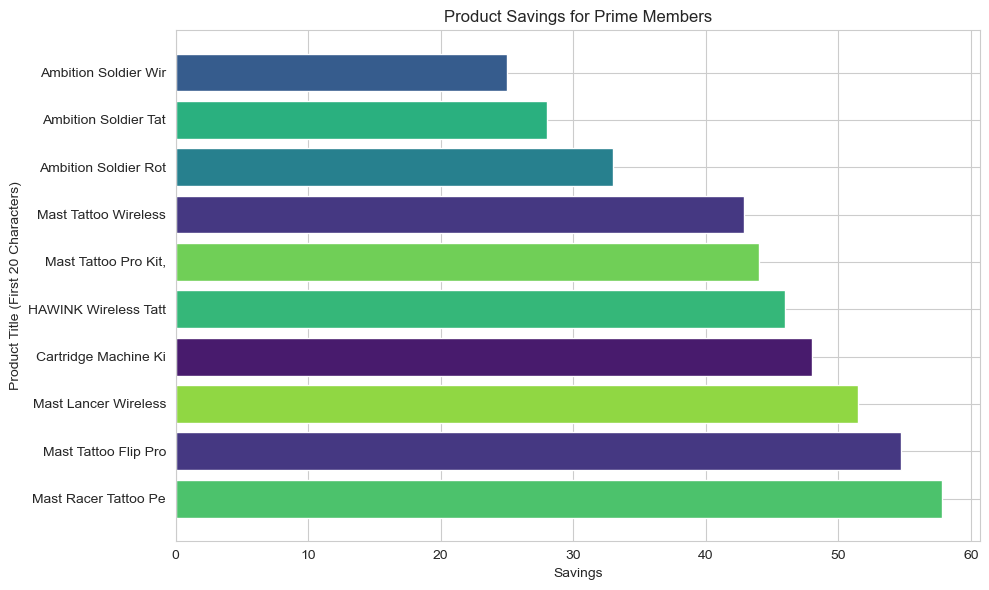

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Assuming you have the 'sorted_result' DataFrame

# Create a bar plot to visualize the savings with multiple random colors
plt.figure(figsize=(10, 6))

# Extract the first 20 characters of the 'title' column
short_titles = [title[:20] for title in sorted_result['title']]
savings = sorted_result['savings']

# Define a list of random colors for each bar
colors = [plt.cm.viridis(random.random()) for _ in range(len(savings))]

bars = plt.barh(short_titles, savings, color=colors)

# Customize the plot
plt.title("Product Savings for Prime Members")
plt.xlabel("Savings")
plt.ylabel("Product Title (First 20 Characters)")

# Show the plot
plt.tight_layout()
plt.show()

**C. Percentages of product types in the data**

This query uses a common substring search and categorizes the products into different types. If the 'title' values contain variations of   
these product types, this query captures them and provides a breakdown of the percentages for each product type.

**SQL Query:**

WITH product_types AS (  
  SELECT  
    CASE  
      WHEN LOWER(title) LIKE '%tattoo machine%' THEN 'Tattoo Machine'  
      WHEN LOWER(title) LIKE '%arm rest%' THEN 'Arm Rest'  
      WHEN LOWER(title) LIKE '%printer%' THEN 'Printer'  
      WHEN LOWER(title) LIKE '%kit%' THEN 'Kit'  
      ELSE 'Other'  
    END AS product_type  
  FROM best_sellers  
)  
SELECT  
  product_type,  
  COUNT(*) * 100.0 / (SELECT COUNT(*) FROM product_types) AS percentage  
FROM product_types  
GROUP BY product_type;

**Python Query:**

In [55]:
import pandas as pd

# Assuming you have the 'tattoo_data' DataFrame

# Define a function to categorize product types based on 'title'
def categorize_product(title):
    title = title.lower()
    if 'tattoo machine' in title:
        return 'Tattoo Machine'
    if 'arm rest' in title:
        return 'Arm Rest'
    if 'printer' in title:
        return 'Printer'
    if 'kit' in title:
        return 'Kit'
    return 'Other'

# Apply the categorization function to create a new 'product_type' column
tattoo_data['product_type'] = tattoo_data['title'].apply(categorize_product)

# Group by 'product_type' and calculate the percentage
product_type_counts = tattoo_data['product_type'].value_counts()
percentage = (product_type_counts / len(tattoo_data)) * 100

# Create a DataFrame to display the results
result = pd.DataFrame({'product_type': product_type_counts.index, 'percentage': percentage})
result = result.sort_values(by='percentage', ascending=False).reset_index(drop=True)

# Display the result
print(result)

     product_type  percentage
0  Tattoo Machine   53.508772
1             Kit   21.929825
2           Other   14.912281
3         Printer    6.140351
4        Arm Rest    3.508772


**Matplotlib Visualization**

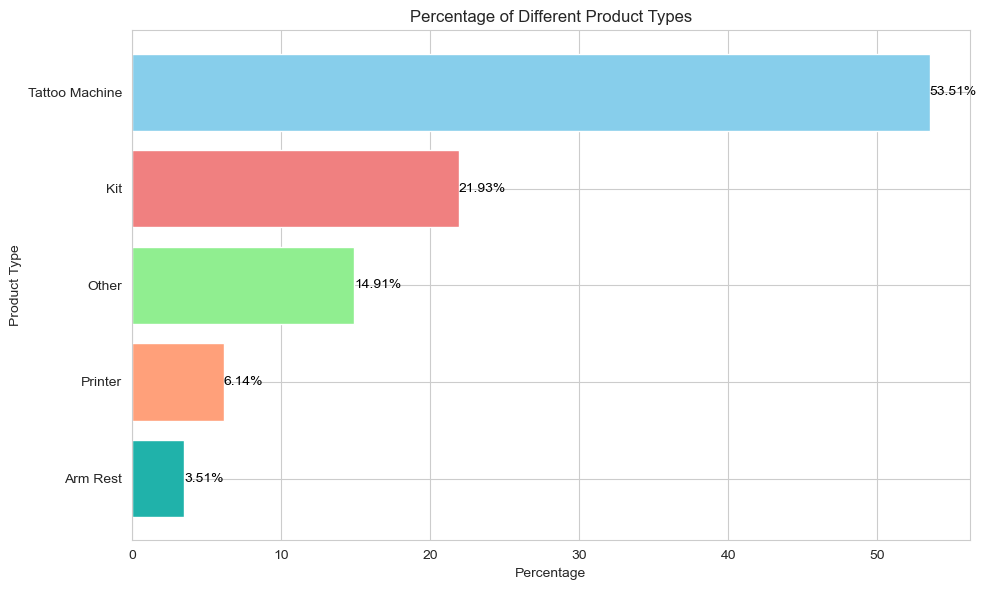

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'result' DataFrame from the previous code

# Define colors for each product type
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.barh(result['product_type'], result['percentage'], color=colors)

# Customize the plot
plt.title("Percentage of Different Product Types")
plt.xlabel("Percentage")
plt.ylabel("Product Type")
plt.gca().invert_yaxis()

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()